In [1]:
import torch  
import torch.utils.data as Data  
import torch.nn.functional as F  
from torch.autograd import Variable  
import matplotlib.pyplot as plt

('Epoch:', 1, 'Training...')
('Epoch:', 2, 'Training...')
('Epoch:', 3, 'Training...')
('Epoch:', 4, 'Training...')
('Epoch:', 5, 'Training...')
('Epoch:', 6, 'Training...')
('Epoch:', 7, 'Training...')
('Epoch:', 8, 'Training...')
('Epoch:', 9, 'Training...')
('Epoch:', 10, 'Training...')
('Epoch:', 11, 'Training...')
('Epoch:', 12, 'Training...')


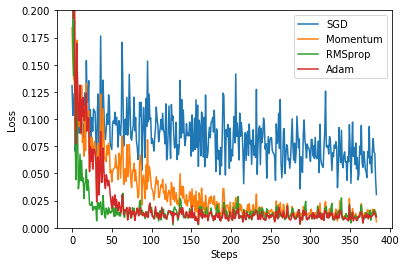

In [2]:
torch.manual_seed(1) # 设定随机数种子  
  
# 定义超参数  
LR = 0.01 # 学习率  
BATCH_SIZE = 32 # 批大小  
EPOCH = 12 # 迭代次数  
  
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)  
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))  
  
#plt.scatter(x.numpy(), y.numpy())  
#plt.show()  
  
# 将数据转换为torch的dataset格式  
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)  
# 将torch_dataset置入Dataloader中  
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE,  
                         shuffle=True, num_workers=2)  
  
class Net(torch.nn.Module):  
    def __init__(self):  
        super(Net, self).__init__()  
        self.hidden = torch.nn.Linear(1, 20)  
        self.predict = torch.nn.Linear(20, 1)  
  
    def forward(self, x):  
        x = F.relu(self.hidden(x))  
        x = self.predict(x)  
        return x  
  
# 为每个优化器创建一个Net  
net_SGD = Net()  
net_Momentum = Net()  
net_RMSprop = Net()  
net_Adam = Net()  
  
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]  
  
# 初始化优化器  
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)  
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)  
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)  
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))  
  
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]  
  
# 定义损失函数  
loss_function = torch.nn.MSELoss()  
losses_history = [[], [], [], []] # 记录training时不同神经网络的loss值  
  
for epoch in range(EPOCH):  
    print('Epoch:', epoch + 1, 'Training...')  
    for step, (batch_x, batch_y) in enumerate(loader):  
        b_x = Variable(batch_x)  
        b_y = Variable(batch_y)  
  
        for net, opt, l_his in zip(nets, optimizers, losses_history):  
            output = net(b_x)  
            loss = loss_function(output, b_y)  
            opt.zero_grad()  
            loss.backward()  
            opt.step()  
            l_his.append(loss.data[0])  
  
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']  
  
for i, l_his in enumerate(losses_history):  
    plt.plot(l_his, label=labels[i])  
plt.legend(loc='best')  
plt.xlabel('Steps')  
plt.ylabel('Loss')  
plt.ylim((0, 0.2))  
plt.show()